In [31]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 457.0 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 661.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=9a9f7728b90e111dad5da3cc47b74f6b26fc43bba8851e01a0461e1c850ae518
  Stored in directory: /Users/daksh/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
df1 = pd.read_csv("605_dataset_upload.csv")
df = pd.read_csv("Mobile_Technology_Survey.csv")

/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_86299/2396255397.py:1: DtypeWarning: Columns (5,82,83,91,92,99,100,101,102,103,104,105,106,112) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("605_dataset_upload.csv")
/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_86299/2396255397.py:2: DtypeWarning: Columns (146,160,162,164,166,225,227,229,231,291,307,309,311,313,319,323,325,327,329,333,337,339,341,346,348,352,354,358,360,362,364) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Mobile_Technology_Survey.csv")


In [4]:
colnames = df1.columns

In [5]:
df = df[colnames]

KeyError: "['Q10(facebook)', 'Q10(whatsapp)', 'Q10(twitter)', 'Q10(instagram)', 'Q10(viber)', 'Q10(snapchat)', 'Q10(tinder)', 'Q11(mobile)', 'Q11(social)', 'Q12(mobile)', 'Q12(social)', 'Q13A(news)', 'Q13A(intouch)', 'Q13A(earning)', 'Q13A(focus)', 'Q13A(comm)', 'Q14A(morality)', 'Q14A(Politics)', 'Q14A(economy)', 'Q14A(education)', 'Q14A(family)', 'Q14A(civility)', 'Q14A(culture)', 'Q14A(health)', 'Q14A(children)', 'Q15(currentevents)', 'Q15(political)', 'Q15(views)', 'Q15(rumors)', 'Q15(debates)', 'Q19(identitytheft)', 'Q19(harassment)', 'Q19(falseinfo)', 'Q19(mobileaddiction)', 'Q19(nocomm)', 'Q19(harmfulcontent)', 'Q21(usagepay)', 'Q21(connection)', 'Q21(sim)', 'Q21(charge)', 'Q21(language)', 'Q21(mobiledata)', 'Q25(mytime)', 'Q25(childrentime)', 'Q31(socialmedia)', 'Q31(television)', 'Q31(radio)', 'Q31(newspaper)', 'Q31(inperson)', 'Age'] not in index"

In [6]:
df.head()

,SPLIT,Q1,Q2a,Q2b,Q3,Q4,Q5,Q6,Q6o,Q7,...,Q55VENrelig,Q55VENreligO,Q55VIErelig,Q55VIEreligO,Q39KENethC,PSFWeight1,PSWeight1,deff,country2,weight
0,2,3,3,1.0,4,1,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37,7,0.338125
1,2,3,3,2.0,2,1,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37,7,1.705711
2,1,1,1,NaN,1,2,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37,7,1.024971
3,2,3,2,1.0,2,1,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37,7,0.580374
4,2,3,1,NaN,4,1,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37,7,1.724519


In [7]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [8]:
# Load the Iris dataset
collist = ['Q40','Q41A','Q41B','Q42','Q43','Q44']
classnames = ['1','2','3','4','95','96','97','99']

#collist2 = ['Q4','Q6','Q7','Q8','Q9','Q10a','Q10b','Q10c','Q10d','Q11a','Q11b']
#collist2 = ['Q4','Q8','Q10a','Q10b','Q11a','Q11b']
#classnames2 = ['1','2','3','4','95','96','97','99']


X = df[collist]
y = df.Q10a
#y=df.Q2a
X.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)

/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_86299/272275794.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method = 'ffill', inplace = True)


In [9]:
X[X.isnull() == True]

,Q40,Q41A,Q41B,Q42,Q43,Q44
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
28117,NaN,NaN,NaN,NaN,NaN,NaN
28118,NaN,NaN,NaN,NaN,NaN,NaN
28119,NaN,NaN,NaN,NaN,NaN,NaN
28120,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
X = X.fillna(0)

In [11]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the decision tree classifier
#clf = DecisionTreeClassifier()
#clf = SVC()
clf = LinearDiscriminantAnalysis()
#clf = QuadraticDiscriminantAnalysis()
# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5861333333333333


In [194]:
# Create the dot data of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=collist,
                                class_names=classnames,
                                filled=True, rounded=True,
                                special_characters=True)

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate the image
image = graph.create_png()

# Display the decision tree
Image(image)

AttributeError: 'QuadraticDiscriminantAnalysis' object has no attribute 'tree_'

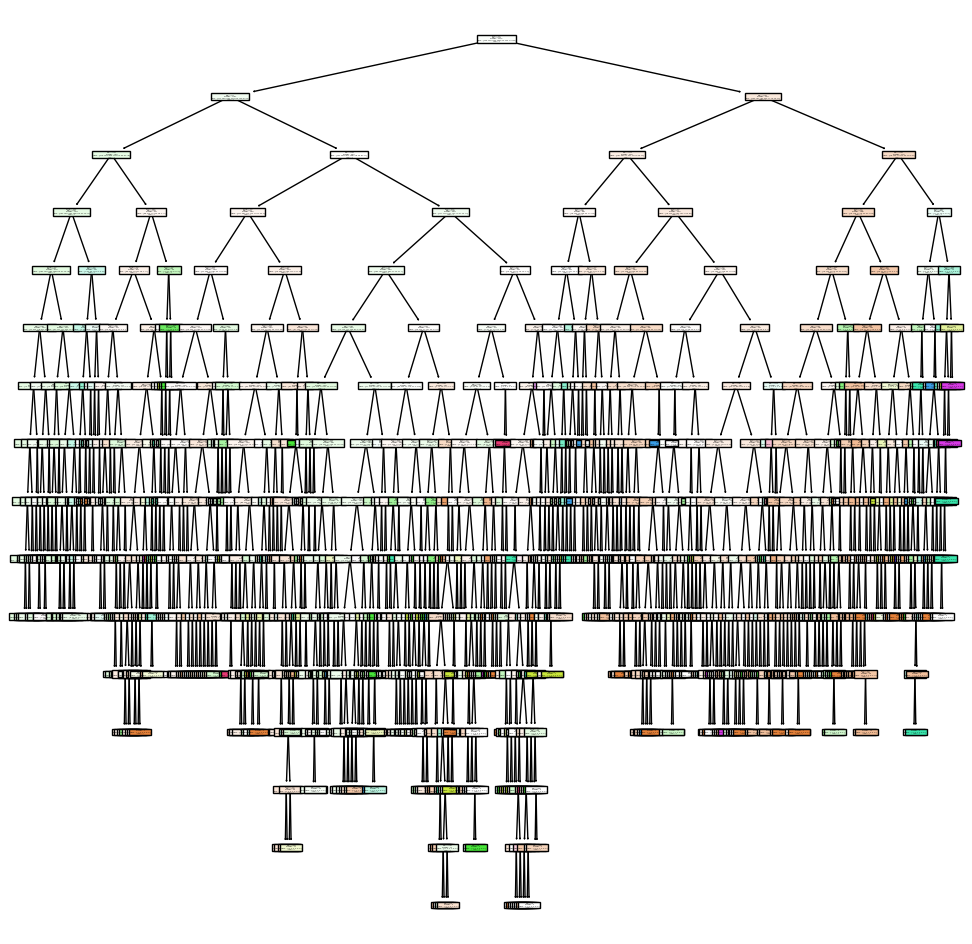

In [22]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, feature_names=collist, class_names=classnames, filled=True, ax=ax)
plt.show()

In [115]:
df3 = df.copy()

In [116]:
df3 = df3.dropna()

In [174]:
# Load the Iris dataset
collist = ['Q40','Q41A','Q41B','Q42','Q43','Q44']
classnames = ['1','2','3','4','95','96','97','99']

collist2 = ['Q4','Q6','Q7','Q8','Q9','Q10a','Q10b','Q10c','Q10d','Q11a','Q11b']
#collist2 = ['Q4','Q8','Q10a','Q10b','Q11a','Q11b']
classnames2 = ['1','2','3','4','95','96','97','99']
X = df[collist]
y = df.Q35a
X.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)

/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_77665/3890981779.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method = 'ffill', inplace = True)


In [128]:
X = X.dropna()
y = y.dropna()

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
X = StandardScaler().fit_transform(X)

In [152]:
print(X)

[[ 0.6848427  -0.31046501  0.01278133 ... -0.18281915 -0.43987453
  -0.56530455]
 [-0.13439776 -0.31046501 -0.11785319 ... -0.18281915 -0.43987453
  -0.56530455]
 [-0.13439776 -0.31046501 -0.11785319 ... -0.18281915 -0.43987453
  -0.56530455]
 ...
 [-0.13439776 -0.13139267 -0.11785319 ... -0.23781752 -0.43987453
  -0.56530455]
 [-0.13439776 -0.13139267 -0.11785319 ... -0.23781752 -0.43987453
   1.77220905]
 [-0.13439776 -0.13139267 -0.11785319 ... -0.18281915 -0.43987453
  -0.56530455]]


In [153]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])

print(principalDf.head())

   principal component 1  principal component 2
0              -0.421543               0.597537
1              -0.501304               0.574599
2              -0.501304               0.574599
3              -0.414922               0.560811
4              -0.372573               0.585002


In [154]:
finalDf = pd.concat([principalDf, y], axis = 1)
print(finalDf.head())

   principal component 1  principal component 2  Q3
0              -0.421543               0.597537   4
1              -0.501304               0.574599   2
2              -0.501304               0.574599   1
3              -0.414922               0.560811   2
4              -0.372573               0.585002   4


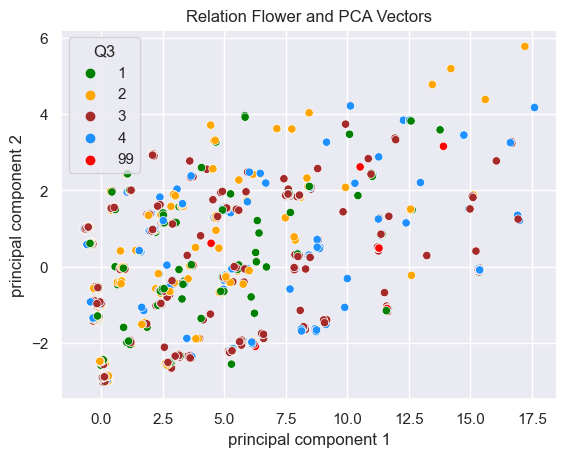

In [158]:
sns.set_theme()
iris_scatterplot = sns.scatterplot(x="principal component 1", y="principal component 2",palette=['green','orange','brown','dodgerblue','red'], data=finalDf, hue="Q3").set(title='Relation Flower and PCA Vectors')

In [159]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE

In [165]:
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=200).fit_transform(X)

X_embedded.shape

(28107, 3)

In [161]:
tsneDf = pd.DataFrame(data = X_embedded
                      , columns = ['tsne 1', 'tsne 2'])

target_dataframe = pd.DataFrame(data=y, columns=['Q3'])

final_tsne_Df = pd.concat([tsneDf, target_dataframe], axis = 1)
print(final_tsne_Df.head())

      tsne 1     tsne 2  Q3
0 -42.045467  46.011681   4
1  14.517856 -41.079384   2
2  14.517856 -41.079384   1
3 -42.065308  45.966301   2
4 -69.352341 -13.150698   4


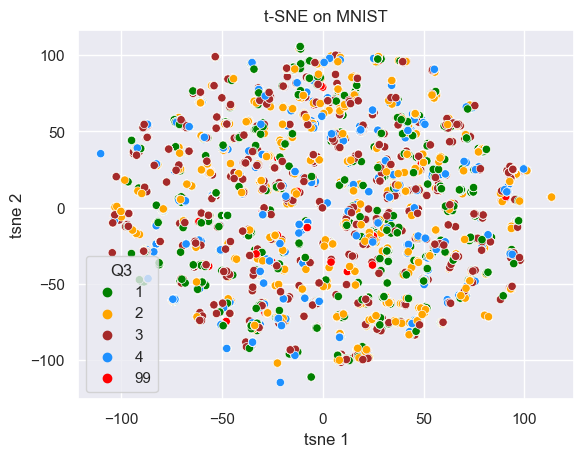

In [163]:
sns.set_theme()
mnist_tsne_scatterplot = sns.scatterplot(x="tsne 1", y="tsne 2", palette=['green','orange','brown','dodgerblue','red'],data=final_tsne_Df, hue="Q3").set(title='t-SNE on MNIST')